In [1]:
import csv

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
xs = [10.23, 20.16, 30.16, 40.6, 50.3, 60.3, 70.1, 79.7, 89, 98.6]
ys = [2.4, 7.6, 16, 28, 43.4, 58, 75, 94, 116, 141]

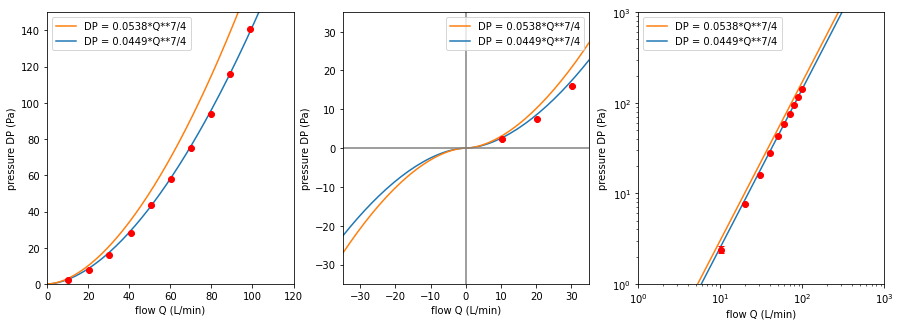

In [22]:
def baseline(x, constant):
    return np.sign(x)*(constant * abs(x)**(7.0/4.0))

(baseline_constant,), covariance = scipy.optimize.curve_fit(baseline, xs, ys)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
curve_xs = np.linspace(-35, 1000, 1000)

for ax in (ax1, ax2, ax3):
    h2, = ax.plot(curve_xs, baseline(curve_xs, baseline_constant), label="DP = {:.4f}*Q**7/4".format(baseline_constant))
    h1, = ax.plot(curve_xs, baseline(curve_xs, 0.0538), label="DP = 0.0538*Q**7/4")
    h0 = ax.errorbar(xs, ys, xerr=0.2, yerr=0.2, fmt="o", c="red", capsize=3)
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 150)
    ax.set_xlabel("flow Q (L/min)")
    ax.set_ylabel("pressure DP (Pa)")
    ax.legend(handles=[h1, h2])

ax2.axvline(0, c="gray")
ax2.axhline(0, c="gray")
ax2.set_xlim(-35, 35)
ax2.set_ylim(-35, 35)

ax3.set_xlim(1, 1000)
ax3.set_ylim(1, 1000)
ax3.set_yscale("log")
ax3.set_xscale("log")

fig.savefig("WS_lpm_calibration-2.pdf")